In [1]:
import networkx as nx
import pandas as pd
import sys
from os import getcwd, path
sys.path.append(path.dirname(getcwd()))

In [2]:
import py2cytoscape.util.util_networkx as util_nx 

In [4]:
ddir = "/Users/elizachang/code/inferelator_ng/data/bsubtilis/"

In [10]:
%matplotlib inline

/Users/elizachang/miniconda2/envs/g2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
from inferelator_ng import design_response as dr

In [7]:
metadata_df = dr.load_metadata_df(ddir + "e_metadata.csv")

In [8]:
dg = nx.DiGraph()

In [9]:
for row in metadata_df[["prev_condition", "condition"]].itertuples(name=None):
    #print row
    dg.add_edge(row[1], row[2])

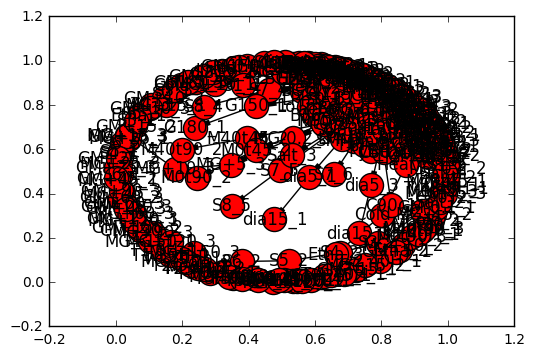

In [11]:
nx.draw_networkx(dg)

In [17]:
from py2cytoscape.data.cynetwork import CyNetwork
from py2cytoscape.data.cyrest_client import CyRestClient
from py2cytoscape.data.style import StyleUtil
import py2cytoscape.util.cytoscapejs as cyjs
import py2cytoscape.cytoscapejs as renderer
import requests
import json
from py2cytoscape import util as cyp

From https://github.com/idekerlab/cy-rest-python/blob/f789203044b4dc870a8b63572a935f92fbd9b89d/basic/CytoscapeREST_Basic3.ipynb

In [18]:
# Basic Setup
PORT_NUMBER = 1234

#IP = '192.168.1.1'
IP = 'localhost'

BASE = 'http://' + IP + ':' + str(PORT_NUMBER) + '/v1/'

# Header for posting data to the server as JSON
HEADERS = {'Content-Type': 'application/json'}


# Delete all networks in current session
requests.delete(BASE + 'session')

<Response [200]>

In [19]:
from IPython.display import Image

In [22]:
cyjs_network = cyp.from_networkx(dg)
res1 = requests.post(BASE + 'networks', data=json.dumps(cyjs_network), headers=HEADERS)
suid_res = res1.json()
suid = suid_res['networkSUID']
requests.get(BASE + 'apply/layouts/force-directed/' + str(suid))
#Image(BASE+'networks/' + str(suid) + '/views/first.png')

<Response [200]>

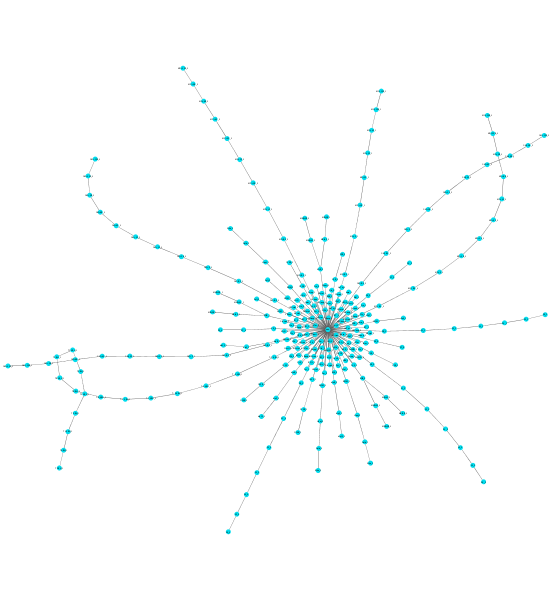

In [23]:
style_name = 'My Visual Style'

my_style = {
  "title" : style_name,
  "defaults" : [ {
    "visualProperty" : "EDGE_WIDTH",
    "value" : 2.0
  }, {
    "visualProperty" : "EDGE_STROKE_UNSELECTED_PAINT",
    "value" : "#555555"
  }, {
    "visualProperty" : "NODE_FILL_COLOR",
    "value" : "#00ddee"
  },{
    "visualProperty" : "NODE_BORDER_WIDTH",
    "value" : 0
  }, {
    "visualProperty" : "NODE_SIZE",
    "value" : 30
  }],
  "mappings" : [ {
    "mappingType" : "discrete",
    "mappingColumn" : "degree",
    "mappingColumnType" : "Double",
    "visualProperty" : "NODE_FILL_COLOR",
    "map" : [ {
      "key" : "1",
      "value" : "#eeeeee"
    }, {
      "key" : "4",
      "value" : "#00FF11"
    } ]
  }, {
    "mappingType" : "passthrough",
    "mappingColumn" : "name",
    "mappingColumnType" : "String",
    "visualProperty" : "NODE_LABEL"
  }, {
    "mappingType": "continuous",
    "visualProperty": "NODE_SIZE", 
    "mappingColumnType": "Double", 
    "mappingColumn": "degree",
    "points": [
        {
            "lesser": "1.0", 
            "equal": "20.0", 
            "value": 1, 
            "greater": "20.0"
        }, 
        {
            "lesser": "100.0", 
            "equal": "100.0", 
            "value": 120, 
            "greater": "1.0"
        }
    ] }
    ]
}

# Delete all style
requests.delete(BASE + "styles")

# Create new Visual Style
res = requests.post(BASE + "styles", data=json.dumps(my_style), headers=HEADERS)
new_style_name = res.json()['title']

# Apply it to current netwrok
requests.get(BASE + 'apply/styles/' + new_style_name + '/' + str(suid))

# Display it here!
Image(BASE+'networks/' + str(suid) + '/views/first.png')